# Plots

In [140]:
import numpy as np
import astropy.units as u
from astropy.table import Table, QTable, join,vstack
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt


from astroquery.simbad import Simbad
from astropy.coordinates import Angle

from  astroquery.gaia import Gaia
import pandas as pd

Lee la MasterTable


In [141]:
MasterTable= Table.read('CatalogosRadio/Master_table.csv') #Leer tabla
#MasterTable.to_pandas()
MasterTable

Name,RA,DEC,Redshift,Magnitud(V),Beam_1,BPA,Speak,RMS,Beam_2,Q,PA,det,morph,log(Lcore),log(Ltotal),logMBH,log[OIII],logEddRatio,AType,Lp15GHz,Dist,St15GHz
str7,str12,str12,float64,float64,str9,float64,str10,float64,str9,str2,float64,str5,str1,str6,float64,str8,str6,str6,str9,float64,float64,float64
IC1459,22 57 10.60,−36 27 44.0,0.0055,10.54,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
NGC1052,02 41 04.80,+08 15 20.8,0.0049,11.04,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
NGC2639,08 43 38.08,+50 12 20.0,0.0111,11.76,--,--,--,--,0.20x0.19,++,68.0,I,C,37.61,38.5,7.94,39.60,-2.93,--,--,--,--
NGC2655,08 55 37.73,+78 13 23.1,0.0047,10.39,--,--,--,--,0.20x0.20,+,0.0,I,E,37.59,37.97,7.74,39.44,-2.89,--,--,--,--
NGC266,00 49 47.80,+32 16 39.8,0.0155,11.82,--,--,--,--,0.48x0.31,+,-40.0,I,A,36.94,37.02,8.37,39.43,-3.53,L1.9,21.28,62.4,4.1
NGC2681,08 53 32.73,+51 18 49.3,0.0023,10.86,0.17x0.14,-87.2,0.34+-0.01,9.6,0.19x0.16,++,51.8,I,C,35.51,35.99,7.07,38.37,-3.29,L1.9,19.48,13.3,1.4
NGC2685,08 55 34.71,+58 44 03.83,0.003,11.35,--,--,--,--,--,--,--,U,-,<34.82,--,6.59^{*},38.41,-2.73,S2/T2,19.45,16.2,0.9
NGC2787,09 19 18.56,+69 12 12.0,0.0023,11.25,--,--,--,--,--,--,--,I,A,36.28,36.41,7.61^{*},38.37,-3.79,L1.9,20.15,13.0,7.0
NGC2841,09 22 02.63,+50 58 35.5,0.0021,10.18,--,--,--,--,0.19x0.16,++,52.7,I,C,34.84,35.47,8.31,38.19,-4.63,--,--,--,--


<ipython-input-142-cf7f92f4dcdf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'No data'),
 Text(1, 0, 'Triple'),
 Text(2, 0, 'Jet+complex'),
 Text(3, 0, 'Core/core-jet'),
 Text(4, 0, 'Undetected'),
 Text(5, 0, 'One-side jete'),
 Text(6, 0, 'Doubled-lobed')]

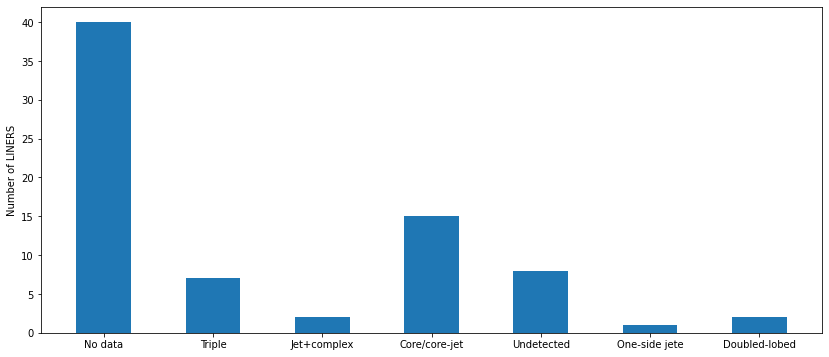

In [142]:
col1 = 'morph'

fig, ax = plt.subplots(figsize=(14,6))# We can select ncols, nrows, or both.
ax.hist(MasterTable[col1], bins=np.arange(0,7,0.5),align='left')   # histogram of column 1
labels = ['No data', 'Triple', 'Jet+complex','Core/core-jet','Undetected', 'One-side jete', 'Doubled-lobed']
ax.set_ylabel('Number of LINERS')
ax.set_xticklabels(labels)


<ipython-input-143-97e0e78c84d2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Core/Core-jet  15
Oneside jet  1
Triple  7
Double-lobed  2
Jet complex  2
Undetected  8
No data  40


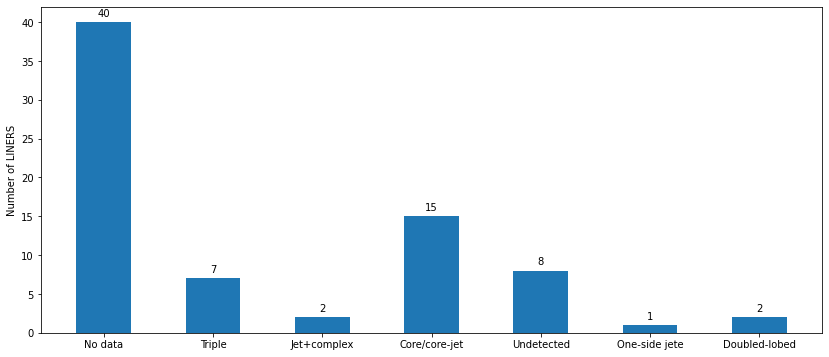

In [143]:
fig, ax = plt.subplots(figsize=(14,6))
ax.hist(MasterTable[col1], bins=np.arange(0,7,0.5),align='left')   

#TICKS
labels = ['No data', 'Triple', 'Jet+complex','Core/core-jet','Undetected', 'One-side jete', 'Doubled-lobed']
ax.set_ylabel('Number of LINERS')
ax.set_xticklabels(labels)

nd=0
triple=0
jetcomplex=0
core_corejet=0
und=0
onesidejet=0
dlobed=0

for i in MasterTable[col1]:
    if (i == "A"):
        core_corejet = core_corejet+1
    elif (i == "B"):
        onesidejet = onesidejet+1
    elif (i == "C"):
        triple = triple+1
    elif (i == "D"):
        dlobed = dlobed+1
    elif (i == "E"):
        jetcomplex = jetcomplex+1
    elif (i == "-"):
        und = und+1
    else:
        nd=nd+1

print ("Core/Core-jet ", (core_corejet))
print ("Oneside jet ", (onesidejet))  
print ("Triple ", (triple))
print ("Double-lobed ", (dlobed))
print ("Jet complex ", (jetcomplex))
print ("Undetected ", (und))
print ("No data ", (nd))

#Números encima
x = np.arange(len(labels))
width = 0.5
total= [nd, triple, jetcomplex,core_corejet, und, onesidejet,dlobed]
pps = ax.bar(x,total,0.5,align = 'center')
for p in pps:
    height = p.get_height()
    ax.text(x=(p.get_x() + p.get_width() / 2), y=height+0.75, s="{}".format(height), ha='center') 

Text(0, 0.5, 'Magnitud(V)')

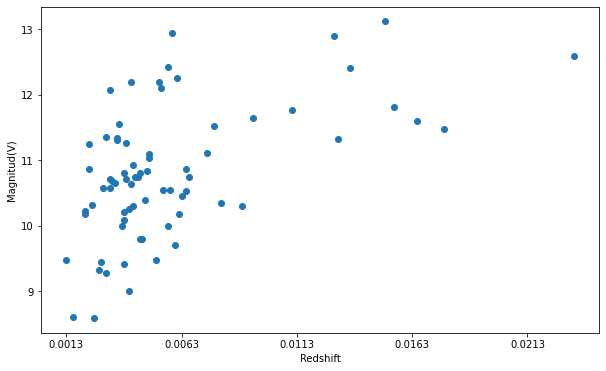

In [144]:
fig,ax = plt.subplots(figsize=(10,6))

ax.plot(MasterTable['Redshift'],MasterTable['Magnitud(V)'],'o')
xmin = min(MasterTable['Redshift'])
xmax= max(MasterTable['Redshift'])
ticks = np.arange(xmin,xmax,0.005)
ax.set_xticks(ticks)
ax.set_xlabel('Redshift')
ax.set_ylabel('Magnitud(V)')
#ax.set_ylim(8,14)



<ipython-input-145-2fdbbf46ab37>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'No data'),
 Text(1, 0, 'L1.9'),
 Text(2, 0, 'S2/T2'),
 Text(3, 0, 'T2'),
 Text(4, 0, 'L2/T2'),
 Text(5, 0, 'L2'),
 Text(6, 0, 'L2/S2'),
 Text(7, 0, 'S1.9/L1.9'),
 Text(8, 0, 'S2'),
 Text(9, 0, 'T2/S2')]

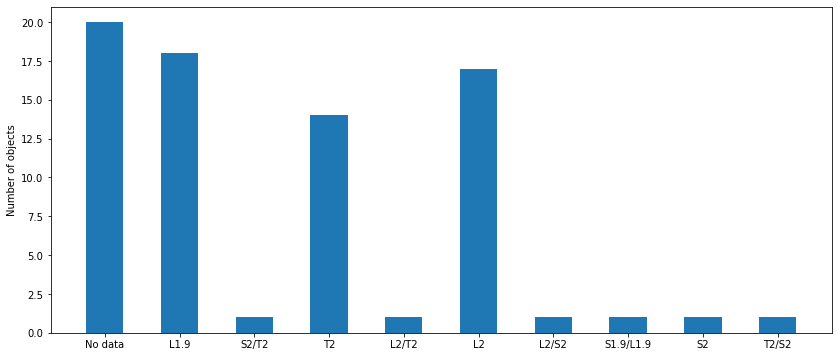

In [145]:
col = 'AType'

fig, ax = plt.subplots(figsize=(14,6))# We can select ncols, nrows, or both.
ax.hist(MasterTable[col], bins=np.arange(0,10,0.5), align='left')   # histogram of column 1
labels = ['No data', 'L1.9', 'S2/T2','T2','L2/T2', 'L2', 'L2/S2', 'S1.9/L1.9', 'S2', 'T2/S2']
ax.set_ylabel('Number of objects')
ax.set_xticklabels(labels)

<ipython-input-206-172fc1a0d0ba>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(33.0, 0, ''),
 Text(34.0, 0, '34-35'),
 Text(35.0, 0, '35-36'),
 Text(36.0, 0, '36-37'),
 Text(37.0, 0, '37-38'),
 Text(38.0, 0, '38-39'),
 Text(39.0, 0, '39-40'),
 Text(40.0, 0, '')]

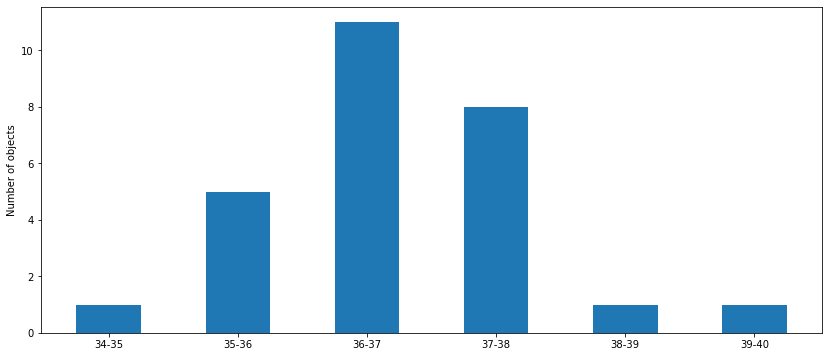

In [206]:
col = 'log(Ltotal)'

MasterTable['log(Ltotal)']=MasterTable['log(Ltotal)'].astype(float)

fig, ax = plt.subplots(figsize=(14,6))# We can select ncols, nrows, or both.
Y,bins= np.histogram(MasterTable[col], bins=np.arange(34,41,1))   # histogram of column 1
#labels = ['No data', 'L1.9', 'S2/T2','T2','L2/T2', 'L2', 'L2/S2', 'S1.9/L1.9', 'S2', 'T2/S2']
ax.bar(bins[:-1],Y,width=0.5)
ax.set_ylabel('Number of objects')
labels = ['','34-35','35-36','36-37', '37-38','38-39','39-40']
ax.set_xticklabels(labels)

El siguiente grafico no es correcto porque logEdd es una string.

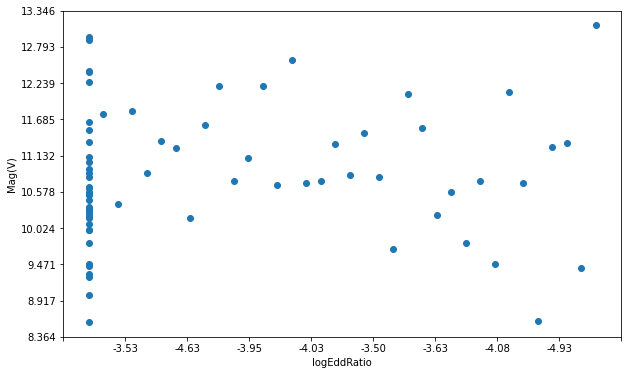

In [213]:
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(MasterTable['logEddRatio'],MasterTable['Magnitud(V)'])
ax.set_xlabel('logEddRatio')
xmin,xmax= ax.get_xlim()
ax.set_xticks(np.linspace(xmin,xmax,10))
ax.set_ylabel('Mag(V)')
ymin,ymax= ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))

TypeError: cannot perform reduce with flexible type

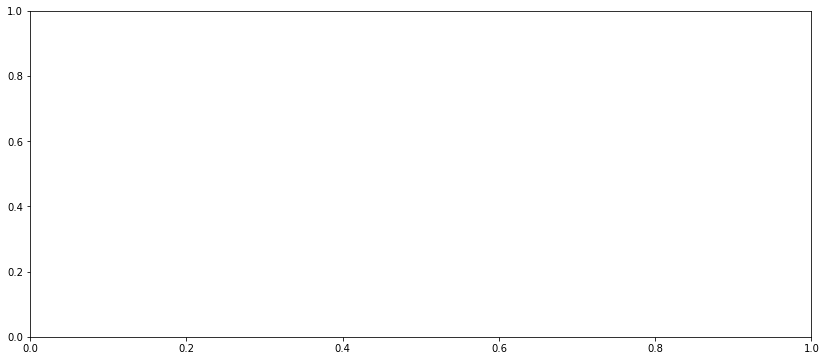